<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Multi-Variable Logistic Regression and Classification Matrix

_Authors: Sam Stack(DC)_


**Exercise Objectives**
- Hand on experience using Multi-Variable Logistic Regression
- Review and Exploration of the Classification Matrix and its evaluation Metrics
- Introduction to One vs. One and One vs. Rest Classifiers.

**Lets get some data.**
One of the most popular classification datasets for Machine learning is the Iris Dataset, which can be loaded directly from `sklearn.datasets`
- Sklearn datasets are imported as dictionaries and use keys to access specific aspects.
    - `iris.data` : actual matrix of observations
    - `iris.target` : target column for classification
    - `iris.feature_names` :  column names

In [30]:
import seaborn as sns
import pandas as pd
from sklearn import datasets # import built-in datasets

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()


In [7]:
# Turn sklearn dataset into dataframe (Features)
X = pd.DataFrame(iris.data, columns = iris.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Break down of classes**  
0 : Setosa  
1 : Versicolour  
2 : Virginica  

----

**Modelling**
This data is extreamly neat and tidy so no cleaning necessary and we can get right into modelling.

In [12]:
# Examine the data
print(X.shape)
print(len(y))

(150, 4)
150


In [13]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [16]:
# model the data
#Train test split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.25, random_state=24)

In [17]:
# initiate the log_reg model
logreg = LogisticRegression()
#Fit the model
log_model = logreg.fit(X_train, y_train)

In [18]:
# predict on the model
preds = log_model.predict(X_test)


In [34]:
confusion_matrix(y_test, preds)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 18]])

In [37]:
# create function for confusion matrix
def mod_eval(df,predictions, y_test, title):
    # prints confusion matrix heatmap    
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='.3g', xticklabels=['Setosa', 'Versicolour', 'Virginica'], yticklabels=['Setosa', 'Versicolour', 'Virginica']).set_title(title)
    plt.xlabel('Real')
    plt.ylabel('Predict')


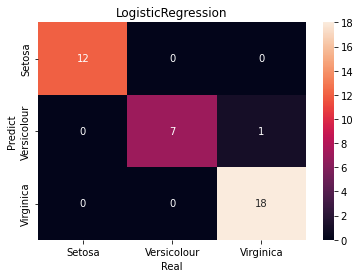

In [38]:
# evaluated model preformance with a confusion matrix.
mod_eval(X, preds, y_test, 'LogisticRegression')

In [39]:
# use predict_proba to find out.
probabilities = log_model.predict_proba(X_test)[:,1]

In [40]:
probabilities

array([0.03215198, 0.05193899, 0.83175424, 0.8889745 , 0.00794566,
       0.03021565, 0.02760961, 0.5901969 , 0.03469216, 0.0477964 ,
       0.04277051, 0.02043334, 0.03698095, 0.15649232, 0.01675338,
       0.01638524, 0.10188339, 0.04353843, 0.02455179, 0.03173407,
       0.07943655, 0.02691245, 0.01721242, 0.83434932, 0.0233446 ,
       0.03452838, 0.0707167 , 0.14148741, 0.02675828, 0.00875362,
       0.78739124, 0.02343953, 0.47893061, 0.94385978, 0.48379713,
       0.16022212, 0.0377687 , 0.72622847])

In [42]:

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.88      0.93         8
           2       0.95      1.00      0.97        18

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



## Intro to Ensembling

Earlier we talked about building models relative to class combinations.  Distinguishing One class from all other classes or just One specific class from another specific class.  These goals are possible with Logistic Regression.

Up until this point we have used one model, but there are also Machine Learning methods that involve combining several models to come to a more refined conclusion, commonly reffered to as Ensemble Methods.

### One Vs. Rest Classification.

One vs. Rest Classification is a method that builds an individual model for each class to try to distingush said specific class from the rest of the classes.  Since we are only focusing on one class, `Class 1` these classfiers will group `Class2`, `Class3`, `Class4` into a single class of `Not Class 1`.  Same all the way through for the rest of the classes.

1 - Class1 vs. Class2, Class3, Class4  
2 - Class2 vs. Class1, Class3, Class4  
3 - Class3 vs. Class1, Class2, Class4   
4 - Class4 vs. Class1, Class2, Class3  

### One Vs. One Classification.

We train a model for every set of classes.  As more classes are added this becomes more computationally expense.  

1 - Class1 vs. Class2  
2 - Class1 vs. Class3  
3 - Class1 vs. Class4  
4 - Class2 vs. Class3  
5 - Class2 vs. Class4  
6 - Class3 vs. Class4  


#### One Vs. Rest Classifier

In [44]:
# instantiate choose model
LR = LogisticRegression()
# place the model in the ensembler
OVC = OneVsRestClassifier(LR)
# use the ensemble method like a normal sklearn model.
OVC.fit(X_train, y_train)


# you can use the train test split you created earlier or do a new TTS.

OneVsRestClassifier(estimator=LogisticRegression())

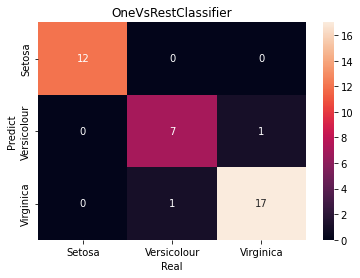

In [47]:
# use the .predict and confusion matrix the same way
y_pred = OVC.predict(X_test)

mod_eval(X, y_pred, y_test, 'OneVsRestClassifier')



#### One Vs. One Classifier

In [48]:
LR = LogisticRegression()
# OvO works the same as OvR
OVO = OneVsOneClassifier(LR)
OVO.fit(X_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression())

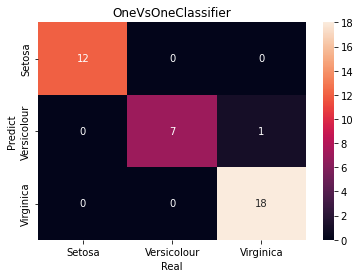

In [50]:
# Make prediction and evaluate confusion matrix.
y_pred = OVO.predict(X_test)
mod_eval(X, y_pred, y_test, 'OneVsOneClassifier')

One Vs. One/Rest Classifiers are not restricted to fitting using Logistic Regression.  With SKLearn, any type of Classification model can be placed into the One Vs X classification ensemble.